<a href="https://colab.research.google.com/github/leejungp2/dl-study/blob/main/240202_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고 자료
- [딥러닝 파이토치 교과서](https://wikidocs.net/book/2788)
- Udemy Pytorch Bootcamp

# 딥러닝 파이토치 교과서

### 순환 신경망(Recurrent Neural Network, RNN) 개념

- RNN 정의: 입력과 출력을 시퀀스(sequence) 단위로 처리하는 시퀀스 모델
  - 입력: 번역하고자 하는 문장, 단어 시퀀스
  - 출력: 번역된 문장, 단어 시퀀스
- RNN 원리
  - 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서
  - 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징이 있음
  - 아래 그림에서 x는 입력벡터, y는 출력벡터

    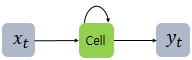

- 셀(cell): 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드
  - 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 '메모리 셀' 또는 'RNN 셀'이라고 표현
  - 은닉층의 메모리 셀은 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 함
- 은닉 상태(hidden state): 메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값
  - ex)  현재 시점 t의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용


- cf) 피드 포워드 신경망(feed forward neural network)
  - 은닉층에서 활성화 함수를 지난 값이 오직 출력층 방향으로만 향하는 신경망
  - '뉴런'이라는 단위 사용 <-> RNN에서는 '은닉 상태'라는 표현을 많이 사용

- 아래 그림은 벡터의 차원이 4, 은닉 상태의 크기가 2, 출력층의 출력 벡터의 차원이 2인 RNN이 시점이 2일 때의 모습

    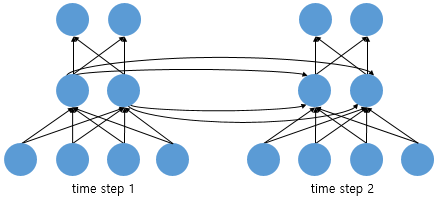

- RNN 특징
  - RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용할 수 있음
  -  RNN 셀의 각 시점 별 입, 출력의 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'
- RNN 종류
  - 일대다(one-to-many): 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning)
  - 다대일(many-to-one): 감성 분류(sentiment classification), 스팸 메일 분류(spam detection)
  - 다대다(many-to-many): 챗봇, 번역기, 품사 태깅

## RNN 수식

- h_t: 현재 시점 t에서의 은닉 상태 값
- W_x: 입력층에서 입력값을 위한 가중치
- W_h: 이전 시점 t-1의 은닉상태 값인 h_t-1을 위한 가중치

    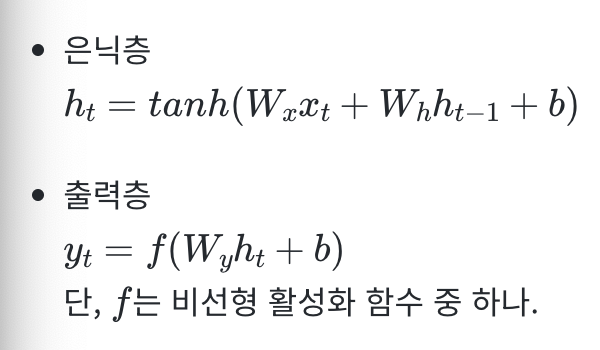

### 벡터와 행렬 연산으로 나타낸 경우
- x_t: 자연어처리 내 입력(단어벡터)
- d: 단어 벡터의 차원
- D_h: 은닉 상태의 크기
  
  이 때, 각 벡터와 행렬의 크기는 다음과 같음

  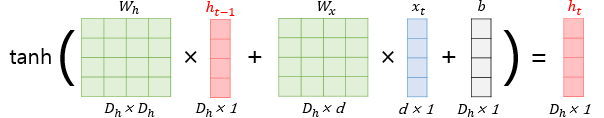

이 때 각각을 계산하기 위해서는 다음을 사용
- h_t: 하이퍼볼릭탄젠트 함수, ReLU 사용
- 각각의 가중치(W_x, h, y)는 모든 시점에서 값을 동일하게 공유
  - 은닉층이 2개 이상일 경우 은닉층의 가중치는 서로 다름
- 출력층(y_t): 시그모이드 함수(이진분류), 소프트맥수 함수(다양한 카테고리 분류) 사용


## 구현 연습 1 - numpy

In [ ]:
import numpy as np

timesteps = 10 # 시점 수. 문장 길이
input_size = 4 # 입력 차원. 단어 벡터 차원
hidden_size = 8 # 은닉 상태 크기. 메모리 셀 용량

inputs = np.random.random((timesteps, input_size)) #입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0벡터로 초기화
#은닉 상태의 크기 hidden_size로 은닉 상태를 만듦.

In [ ]:
print(hidden_state_t) #8의 크기를 갖는 은닉상태. 현재는 초기 은닉 상태로 모든 차원이 0을 가짐

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 가중치, 편향 정하기
Wx = np.random.random((hidden_size, input_size)) #(8, 4) 크기의 2D 텐서 생성. 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) #(8, 8) 크기의 2D 텐서 생성. 은닉 상태에 대한 가중치
b = np.random.random((hidden_size,)) #(8,) 크기의 1D 텐서 생성. 이 값은 편향.


In [ ]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [ ]:
# 층 동작 시키기
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라 입력값 입력
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)
# 출력시 값을 깔끔히 해줌

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우(10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.80708565 0.91297447 0.91138407 0.92401938 0.96691473 0.95218236
  0.88549646 0.94058016]
 [0.99949647 0.99996864 0.9987846  0.9998664  0.99999296 0.99995032
  0.99999411 0.99967386]
 [0.999481   0.99996603 0.99831066 0.99982059 0.99998823 0.99995231
  0.9999932  0.99965643]
 [0.99961554 0.99997117 0.99846283 0.99984566 0.99999252 0.9999633
  0.99999644 0.99969323]
 [0.99989155 0.99999821 0.99984682 0.99999301 0.99999964 0.99999296
  0.99999966 0.9999346 ]
 [0.99985752 0.99999497 0.99979142 0.99997823 0.99999931 0.99998919
  0.99999896 0.9999228 ]
 [0.99967662 0.99999619 0.99965842 0.99997311 0.99999845 0.99998084
  0.99999785 0.99980492]
 [0.99966893 0.99999393 0.99946206 0.99996785 0.99999731 0.99997773
  0.99999783 0.99980147]
 [0.99980546 0.99999045 0.9993761  0.99996107 0.99999797 0.99998324
  0.999999   0.99985616]
 [0.99961076 0.99999101 0.99889163 0.99996195 0.9999941  0.99997125
  0.99999803 0.99973755]]

##구현 연습 2 - 파이토치

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_size = 5
hidden_size = 8

In [ ]:
# batch size * time_steps(시점 수), input_size(매 시점마다 들어가는 입력)
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size, hidden_size, batch_first = True)

In [ ]:
outputs, _status = cell(inputs)

In [ ]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [ ]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


## !!!! LSTM 짚고 넘어가기

# Pytorch Bootcamp

## 00. Basic

### Standard import

In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


- torch: PyTorch는 딥러닝 프레임워크입니다. 이 코드에서 신경망 모델 구현에 사용됩니다.
- torch.nn: 신경망 모듈입니다. LSTM과 선형 레이어를 구현하기 위해 사용됩니다.
- numpy, pandas, matplotlib: 데이터 처리 및 시각화를 위한 라이브러리입니다.
- %matplotlib inline: Jupyter Notebook에서 그래프를 출력할 때 사용되는 명령어입니다.

### Create a sine wave dataset

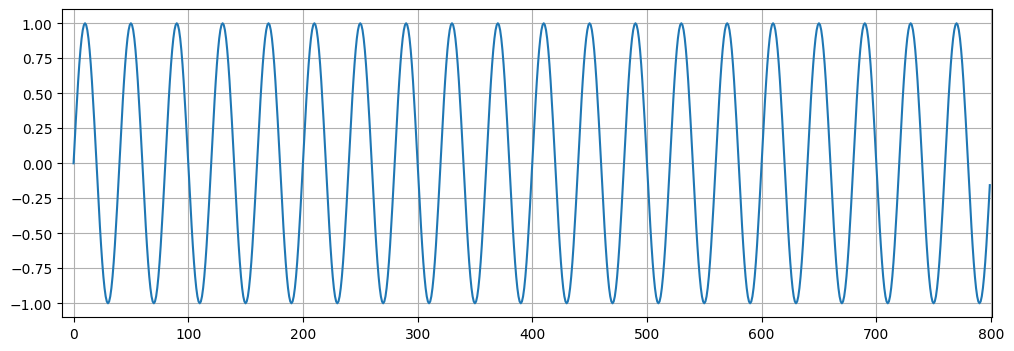

In [ ]:
# 800 data points and assign 40 points per full cycle, for a total of 20 complete cycles
x = torch.linspace(0, 799, steps = 800)
y = torch.sin(x*2*3.1416/40)

plt.figure(figsize = (12, 4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy());

<코드 설명>

- x: 시간 축(time series) 데이터 역할
  - 0~799까지의 연속적인 값으로 이루어져 있음
- y: 사인 함수로 생성된 시계열 데이터
  - 2 * 3.1416: 사인 함수에서 하나의 주기(원주율 2π)
  - 40: 한 주기가 40개의 데이터 포인트로 구성되도록 조정
- x는 시계열의 시간 축(인덱스) 역할을 하고, y는 사인 곡선 값 역할을 함
---
- torch.linspace: 0부터 799까지 균등하게 분포된 800개의 데이터를 생성합니다.
- torch.sin: 생성된 데이터를 이용해 사인 함수 값을 계산합니다.
- plt.plot: 시계열 데이터를 시각화합니다.

### Create train and test sets

In [ ]:
# 760 samples in our series as a training sequence, and the last 40 for testing
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

- -는 역방향 슬라이싱 의미

### Prepare the training data

**LSTM 모델에서의 윈도우(Window) 방식 설명**
- LSTM 모델을 학습할 때는 훈련 시퀀스를 겹치는 "윈도우" 단위로 나눔
- 각 윈도우는 일련의 샘플들로 구성됨
---

**윈도우와 레이블 개념**
- 각 윈도우의 **레이블(label)**은 그 시퀀스 바로 다음에 나오는 값을 의미
- LSTM이 주어진 패턴(시퀀스) 뒤에 어떤 값이 나올지 학습하게 됨
- LSTM 레이어는 각 샘플에 대한 예측을 모두 출력하지만, 우리는 마지막 샘플의 예측값만 신경 쓰면 됨
---
**예시**
- 시퀀스 길이가 15개인 데이터가 있고, 윈도우 크기 k = 5라고 가정합니다.
- 처음에 [x₁, x₂, x₃, x₄, x₅]를 모델에 입력합니다.
- 이 시퀀스에 대해 모델이 예측한 값과 실제 값 **x₆**을 비교하여 손실(loss)을 계산합니다.
- 그런 다음, 역전파(backpropagation)를 통해 파라미터를 업데이트합니다.
- 그 다음에는 [x₂, x₃, x₄, x₅, x₆]을 입력하고, 모델이 예측한 값을 **x₇**과 비교합니다.
- 이런 식으로 마지막 윈도우인 [x₁₀, x₁₁, x₁₂, x₁₃, x₁₄]까지 반복합니다.

---
**input_data 함수 설명**
- input_data 함수는 (시퀀스, 레이블) 튜플을 생성합니다.
- 예를 들어, 윈도우 크기 k = 5인 경우:
  - 첫 번째 튜플: ([x₁, x₂, x₃, x₄, x₅], [x₆])
  - 두 번째 튜플: ([x₂, x₃, x₄, x₅, x₆], [x₇])

---
**튜플의 개수 계산**
- 윈도우가 겹치기 때문에, 전체 데이터에서 생성되는 (시퀀스, 레이블) 튜플의 개수는 다음과 같습니다:
    > 튜플 개수 = 시리즈 길이(시퀀스) - k

In [ ]:
def input_data(seq, ws): # ws: window size
  out = []
  L = len(seq)
  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window, label))
  return out

<코드 설명>

- 함수는 시계열 데이터(seq)를 주어진 윈도우 크기(ws)만큼 나누어 (윈도우, 레이블) 쌍을 생성
- out: 결과 저장할 빈 리스트 생성. 각 윈도우와 그에 대응하는 레이블(다음 값)이 리스트에 추가됨(out.append)
- range(L-ws): 윈도우를  시작할 수 있는 인덱스 범위
- window: seq에서 윈도우 크기만큼 잘라내어 window에 저장
  - ex) *i = 0*일 때 window는 [x₁, x₂, x₃, x₄, x₅]가 됨
- label: 윈도우 다음 값, 모델이 예측해야 할 정답
  - ex) *i = 0*일 때 label은 [x₆]
- 결과는 튜플의 리스트로 반환됨
  - 튜플: 여러 개의 값을 묶어 하나의 단위로 표현

### **'window' vs. 'batch'**
- 윈도우(Window)란?: 데이터 단위
  - 시계열 데이터를 일정 길이로 나눈 단위, 데이터 내에서 시퀀스를 구성하는 단위
  - 각 윈도우는 일정한 길이의 데이터 조각(sequence)
  - LSTM 모델은 윈도우에 있는 시퀀스를 입력으로 받아, 마지막 값(또는 다음 값을) 예측하는 방식으로 학습
  - 예시: 시계열 데이터가 [x₁, x₂, x₃, ..., x₁₅]이고, 윈도우 크기 k = 5라면:
    - 첫 번째 윈도우: [x₁, x₂, x₃, x₄, x₅]
    - 두 번째 윈도우: [x₂, x₃, x₄, x₅, x₆]

- 배치(Batch)란?: 학습 단위
  - 모델이 한 번에 학습할 데이터 묶음
  - 여러 개의 윈도우를 한 번에 모델에 입력하여 병렬로 처리할 수 있음
  - 배치 크기(Batch size)는 한 번의 학습에서 처리할 윈도우의 개수를 나타냄
  - 예시: 윈도우 크기 k = 5, 배치 크기(Batch size) 2인 경우:
    - 첫 번째 배치: 윈도우 2개
    - 윈도우 1: [x₁, x₂, x₃, x₄, x₅]
    - 윈도우 2: [x₂, x₃, x₄, x₅, x₆]
  - 모델은 두 윈도우에 대한 예측을 동시에 수행한 후, 결과를 평균내어 손실을 계산하고 역전파

In [ ]:
window_size = 40

# Create training dataset
train_data = input_data(train_set, window_size)

len(train_data)

720

<코드 설명>
- train_data: input_data 함수를 호출하여 훈련 데이터를 윈도우 단위로 나눔
- len(train_data): 튜플의 개수 = seq - wk

In [ ]:
train_data[0] # display first(seq/label) tuple in train_data

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

In [ ]:
torch.set_printoptions(sci_mode = False) # 텐서의 지수 표기법 출력을 비활성화
train_data[0]

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

### LSTM Model 정의
**LSTM 레이어 구성**
- 입력 크기(input size): 1
  - 각 시퀀스에서 한 개의 값이 들어옴
- 은닉 상태 크기(hidden size): 50
  - LSTM이 학습할 특징(feature) 수를 의미
- Fully-connected layer:
  - 모든 입력 노드가 모든 출력 노드와 연결된 신경망층
  - LSTM 출력값을 최종 예측값으로 변환하기 위해 사용
  - 예측값의 크기는 1

**훈련 시 LSTM에 전달되는 3개의 텐서**
- 입력 시퀀스(sequence): 시계열 데이터가 입력으로 주어짐
- 초기 은닉 상태 ℎ₀ (hidden state): LSTM의 은닉 상태를 초기화
- 초기 셀 상태 𝑐₀ (cell state): LSTM의 셀 상태를 초기화
- cf) 모델 파라미터 텐서: 가중치 + 편향 데이터

**초기화**
- LSTM은 이전 상태(ℎₜ, 𝑐ₜ)를 활용해 새로운 상태를 계산하는 구조이기 때문에, 첫 번째 단계에서는 초기 상태 ℎ₀와 𝑐₀를 제공해야 함
- ℎ₀과 𝑐₀는 임의의 값으로 초기화할 수 있으나, 일반적으로 0으로 초기화하여 일정한 기준에서 학습을 시작

In [ ]:
#Define an LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size) #Add an LSTM layer
        self.linear = nn.Linear(hidden_size, out_size) # fully-connected layer
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size)) #initialize h0, c0

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1] # 마지막 예측값만 알면 됨

<코드 설명>
- class LSTM: nn.Module를 상속하여 LSTM 모델 클래스 정의
- self.lstm: LSTM은 입력 시퀀스를 받아 은닉 상태 및 셀 상태를 반복적으로 계산

### 모델 인스턴스화(instantiate), 손실 및 최적화 함수 정의

In [ ]:
torch.manual_seed(42) #랜덤 시드 고정
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

<코드 설명>

- torch.manual_seed: 랜덤 시드 고정
  - PyTorch는 모델의 초기 가중치나 랜덤 연산(예: 텐서 초기화)에 난수를 사용
  - torch.manual_seed를 통해 난수를 고정하면, 모델 실행마다 동일한 결과를 얻을 수 있음
  - 42는 임의의 시드 값으로, 일반적으로 관용적으로 사용되는 숫자
- model = LSTM(): 모델 인스턴스 생성
- criterion: 손실 함수 정의
  - 평균 제곱 오차(MSE)를 사용하여 예측값과 실제값 간의 오차를 계산
- optimizer: 최적화 함수 정의
  - 확률적 경사 하강법(SGD)을 사용하여 모델의 가중치를 학습률 **lr = 0.01**로 업데이트

In [ ]:
def count_parameters(model):
  params = [p.numel() for p in model.parameters() if p.requires_grad]
  for item in params:
      print(f'{item:>6}')
  print(f'______\n{sum(params):>6}')

count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


<코드 설명>

- count_parameters: 모델의 파라매터 개수를 출력하는 함수
- params:
  - model.parameters(): 모델의 모든 파라미터를 가져옴
  - p.requires_grad: 학습이 필요한 파라미터만 필터링
  - p.numel(): 해당 파라미터 텐서의 요소 개수를 반환
- for문: 파라미터 텐서의 요소 개수 출력
- print: 총 파라미터 개수 출력

---
<결과값>

- 200: LSTM 입력 가중치 텐서의 요소 개수
- 10000: LSTM 은닉 상태 가중치 텐서의 요소 개수
- 200: LSTM의 편향(bias) 텐서의 요소 개수
- 200: LSTM의 두 번째 편향(bias) 텐서. PyTorch의 LSTM은 편향을 두 개로 나누어 사용
- 50: Fully Connected Layer의 가중치 텐서 요소 개수
- 1: Fully Connected Layer의 편향(bias) 요소 개수, 출력 노드
- cf) 요소 개수
  - 텐서(Tensor)는 다차원 배열로, 각 위치에 숫자 값(요소, element)을 저장
  - 요소 개수는 텐서가 담고 있는 모든 값의 개수

### Predicting future values
- 모델이 마지막 40개 값을 예측하는 것이 목표
- 테스트 데이터는 예측 과정에서 사용할 수 없으며 과거 학습된 데이터와 이전 예측값만을 사용해야 함
  - cf) 테스트 데이터를 예측에 직접 사용하면, 모델 성능이 과대평가 될 수 있음

**예측 과정 요약**
- 마지막 윈도우(window): 마지막 40개 데이터(또는 이전 예측값)를 사용하여 첫 번째 예측을 수행
- 새로운 값 예측: 첫 번째 예측값을 시퀀스에 추가
- 다시 예측: 새로 추가된 시퀀스를 기반으로 다음 값을 예측, 이 과정을 반복하여 40개의 값을 예측
- 모델 성능 평가: 예측 값 - 실제 테스트 데이터 비교

### Train and evaluate the model simultaneously
- 10 epochs

Epoch:  1 Loss: 0.09212877
Loss on test predictions: 0.6071590781211853


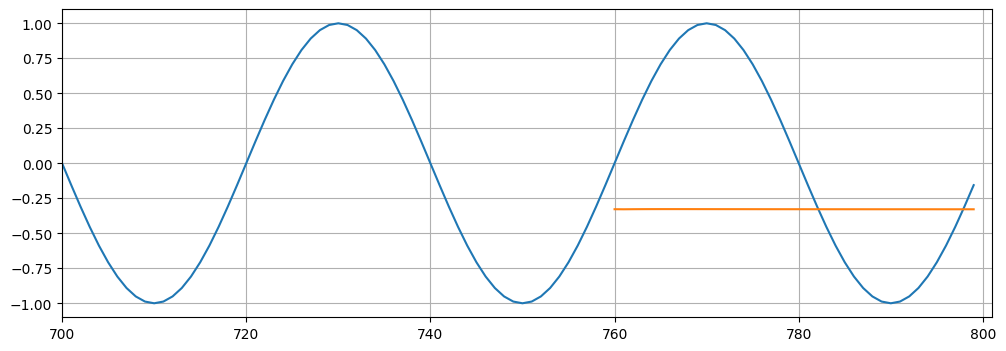

Epoch:  2 Loss: 0.06506764
Loss on test predictions: 0.5650988817214966


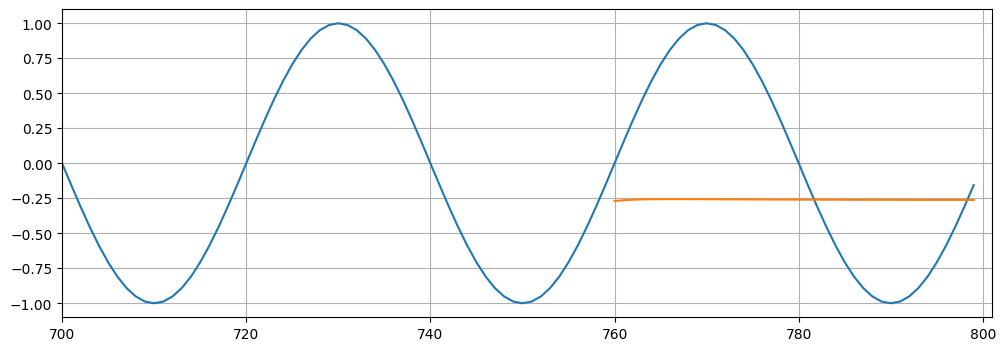

Epoch:  3 Loss: 0.04198049
Loss on test predictions: 0.5199716091156006


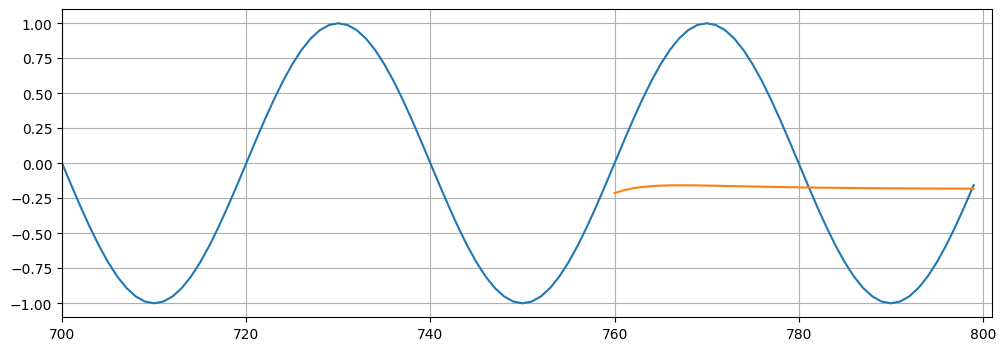

Epoch:  4 Loss: 0.01784278
Loss on test predictions: 0.42209967970848083


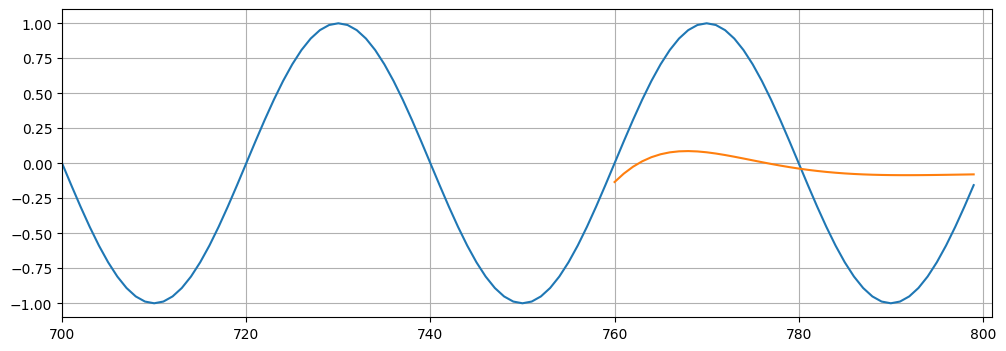

Epoch:  5 Loss: 0.00288710
Loss on test predictions: 0.16624116897583008


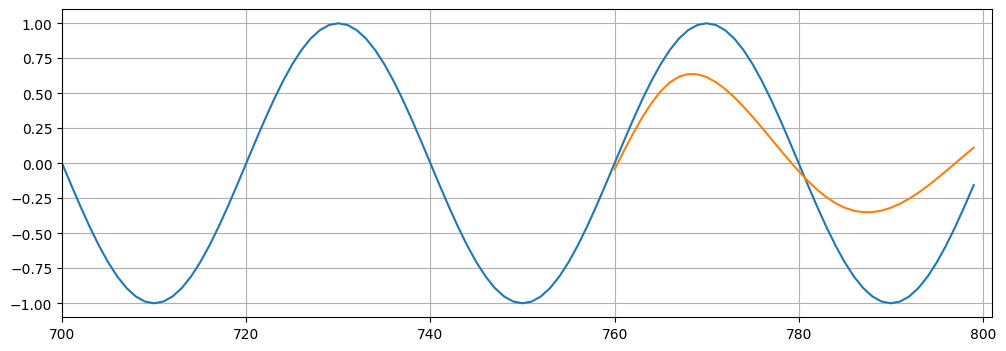

Epoch:  6 Loss: 0.00032008
Loss on test predictions: 0.03055434487760067


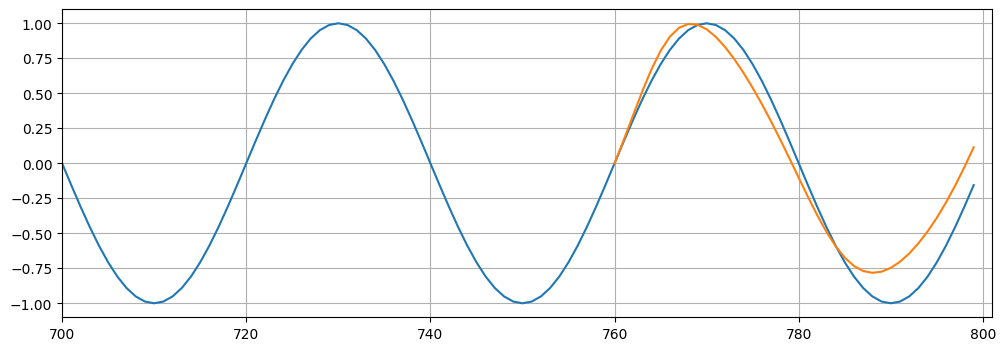

Epoch:  7 Loss: 0.00012969
Loss on test predictions: 0.014990138821303844


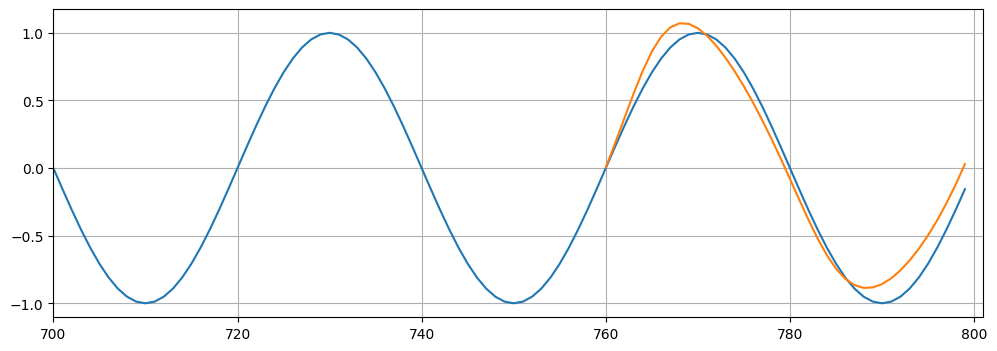

Epoch:  8 Loss: 0.00012007
Loss on test predictions: 0.011856640689074993


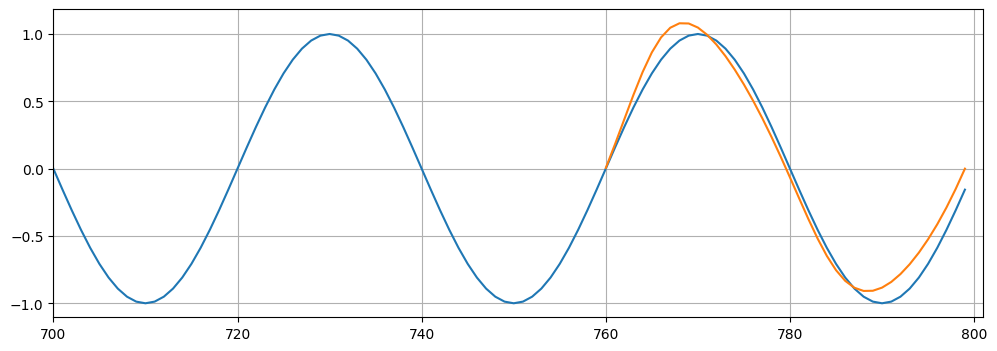

Epoch:  9 Loss: 0.00012656
Loss on test predictions: 0.010163763538002968


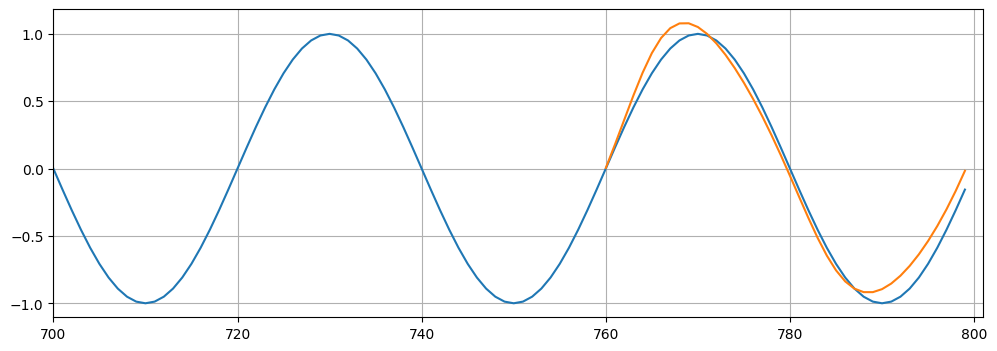

Epoch: 10 Loss: 0.00013195
Loss on test predictions: 0.008897614665329456


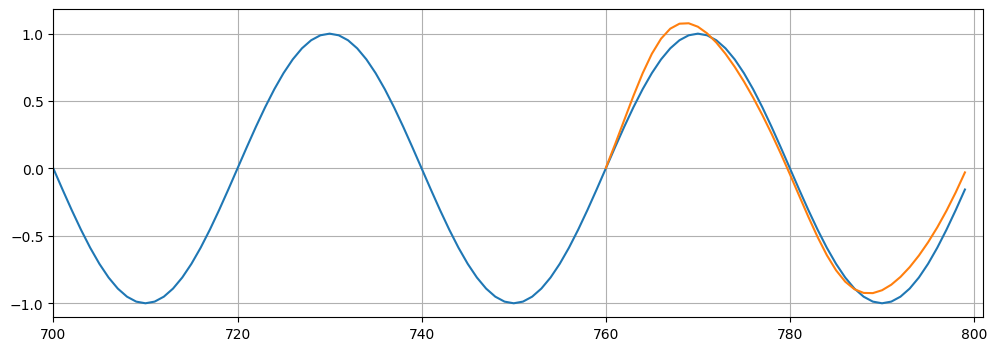

In [ ]:
epochs = 10
future = 40

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}') #training result

    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot
    plt.figure(figsize = (12, 4))
    plt.xlim(700, 801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[window_size:])
    plt.show()


<코드 설명>
- epochs = 10: 모델이 10번 반복하여 학습할 것을 의미
- future = 40: 학습 후 미래의 40개 값을 예측할 목표
---
- for문: train_data는 (윈도우, 레이블) 형태의 데이터로, 반복문을 통해 시퀀스 seq와 정답 y_train을 하나씩 가져옴
- optimizer; 기울기 초기화: 이전 학습 단계에서 계산된 기울기(gradient)를 초기화
- model.hidden; 은닉 상태 초기화
  - LSTM의 은닉 상태 h₀과 셀 상태 c₀를 0으로 초기화
  - 이는 새로운 시퀀스를 학습하기 위한 준비 단계
> 초기화: 같은 시퀀스에서는 은닉 상태가 연속성을 유지하지만, 새로운 시퀀스를 학습할 때는 이전 시퀀스의 상태를 유지하면 안됨
- y_pred: 모델에 입력 시퀀스(seq)를 전달하여 예측값(y_pred)을 생성
---
- loss; 손실 계산: - 모델의 예측값과 실제값 y_train 간의 오차(손실)를 계산
- loss.backward; 역전파(backpropagation): 손실 값을 기반으로 가중치에 대한 기울기를 계산
- optimizer; 가중치 업데이트: 최적화 알고리즘(SGD)을 사용해 모델의 가중치를 업데이트

---
<예측 과정>
- preds: 예측을 위해 마지막 40개 윈도우 데이터를 준비
- for문; 미래 값 예측 루프
  - seq: 마지막 예측값을 포함한 40개 시퀀스를 생성하여 모델에 전달
  - preds: 예측값을 시퀀스에 추가
  - future: 이 과정을 future = 40만큼 반복하여 40개의 미래 값을 예측
- torch.no_grad(): 예측 시에는 기울기 계산을 비활성화하여 메모리 사용량을 줄이고 속도를 높임
- loss: 마지막 40개 값과 테스트 데이터(y[760:])를 비교하여 테스트 손실을 출력
---
<시각화>
- y.numpy(): 실제 데이터 (테스트 데이터 포함)
- preds[window_size:]: 모델이 예측한 마지막 40개의 값
- xlim(700, 801): 데이터의 700번 인덱스부터 800번까지의 구간을 표시

### Train the model - 위와 비교

In [ ]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
    for seq, y_train in train_data:

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00013450
Epoch:  2 Loss: 0.00013458
Epoch:  3 Loss: 0.00013279
Epoch:  4 Loss: 0.00012967
Epoch:  5 Loss: 0.00012561
Epoch:  6 Loss: 0.00012098
Epoch:  7 Loss: 0.00011600
Epoch:  8 Loss: 0.00011086
Epoch:  9 Loss: 0.00010571
Epoch: 10 Loss: 0.00010063
Epoch: 11 Loss: 0.00009569
Epoch: 12 Loss: 0.00009095
Epoch: 13 Loss: 0.00008641
Epoch: 14 Loss: 0.00008211
Epoch: 15 Loss: 0.00007804
Epoch: 16 Loss: 0.00007420
Epoch: 17 Loss: 0.00007059
Epoch: 18 Loss: 0.00006720
Epoch: 19 Loss: 0.00006403
Epoch: 20 Loss: 0.00006105
Epoch: 21 Loss: 0.00005826
Epoch: 22 Loss: 0.00005565
Epoch: 23 Loss: 0.00005321
Epoch: 24 Loss: 0.00005092
Epoch: 25 Loss: 0.00004876
Epoch: 26 Loss: 0.00004674
Epoch: 27 Loss: 0.00004485
Epoch: 28 Loss: 0.00004307
Epoch: 29 Loss: 0.00004139
Epoch: 30 Loss: 0.00003981
Epoch: 31 Loss: 0.00003832
Epoch: 32 Loss: 0.00003691
Epoch: 33 Loss: 0.00003559
Epoch: 34 Loss: 0.00003433
Epoch: 35 Loss: 0.00003314
Epoch: 36 Loss: 0.00003201
Epoch: 37 Loss: 0.00003094
E

### Predict future values, plot the result - 위와 비교2

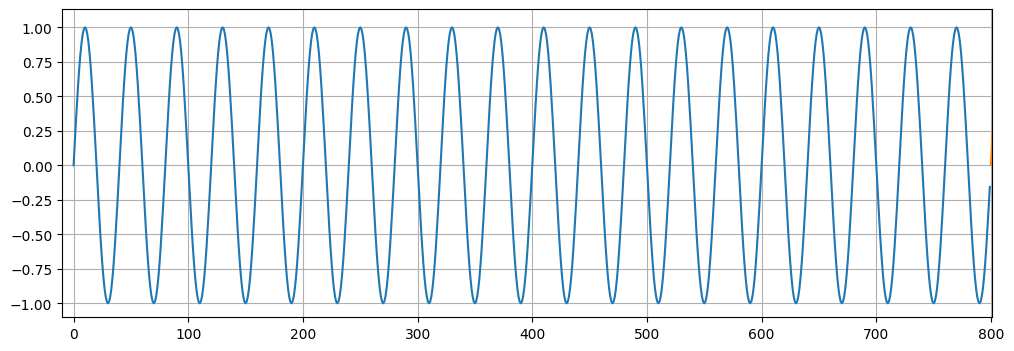

In [ ]:
preds = y[-window_size:].tolist()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad(): #reset hidden parameters
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))
        preds.append(model(seq).item())

# 시각화
plt.figure(figsize = (12, 4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800, 800+future), preds[window_size:])
plt.show()